# Mining Twitter: Exploring Trending Topics, Discovering What People Are Talking about 

Learning Overview:
- Twitter's developer platform and how to make API requests
- Tweet metadata and how to use it
- Extracting entities such as user mentions, hashtags, and URLs from tweets
- Techniques for performing frequency analysis with Python
- Plotting histograms of Twitter data with Jupyter Notebook

# Creating the Twitter API Connection

In [2]:
!pip3 install twitter --user

In [3]:
# For accessing Twitter API go to htp://dev.twitter.com/apps/new to create an app and get the values for these 
# credentials. Provide the given credentials in place of the empty strings.
# For more info regarding Twitter's OAuth see https://developer.twitter.com/en/docs/basic/authentication/overview/auth

In [4]:
# importing Twitter library
import twitter

In [5]:
# input Twitter credentials
CONSUMER_KEY = 'REPLACE_THIS_WITH_YOUR_CONSUMER_KEY'
CONSUMER_SECRET = 'REPLACE_THIS_WITH_YOUR_CONSUMER_SECRET'
OAUTH_TOKEN = 'REPLACE_THIS_WITH_YOUR_OAUTH_TOKEN'
OAUTH_TOKEN_SECRET = 'REPLACE_THIS_WITH_YOUR_OAUTH_TOKEN_SECRET'

In [6]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                          CONSUMER_KEY, CONSUMER_SECRET)

In [7]:
twitter_api = twitter.Twitter(auth=auth)

In [8]:
twitter_api

# Exploring Trending Topics

In [9]:
# With an authorized API connection in place, we can now issue a request, asking Twitter for topics that are 
# currently trending worldwide.
# We will use as our query: 'Yahoo! Geoplanet's Where on Earth (WOE) ID system'.

In [10]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See http:/bit.ly/2BGWJBU and 
# http://bit.ly/2MsvwCQ

In [11]:
WORLD_WOE_ID = 1        # 1 represents query for worldwide
US_WOE_ID = 23424977    # 23424977 represents query for USA

In [12]:
# Prefix ID with the underscore is used as query string parametrization.
# Without the underscore, the twitter package appends the ID value to the
# URL itself as a special case keyword argument.

In [13]:
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)

In [128]:
# Printing the first 5 worldwide trends
world_trends[:5]

[{'trends': [{'name': '#DíaDelMaestro',
    'url': 'http://twitter.com/search?q=%23D%C3%ADaDelMaestro',
    'promoted_content': None,
    'query': '%23D%C3%ADaDelMaestro',
    'tweet_volume': 19035},
   {'name': '#TsunamiDaEducação',
    'url': 'http://twitter.com/search?q=%23TsunamiDaEduca%C3%A7%C3%A3o',
    'promoted_content': None,
    'query': '%23TsunamiDaEduca%C3%A7%C3%A3o',
    'tweet_volume': 174934},
   {'name': 'Black Mirror',
    'url': 'http://twitter.com/search?q=%22Black+Mirror%22',
    'promoted_content': None,
    'query': '%22Black+Mirror%22',
    'tweet_volume': 60422},
   {'name': '#BTSonGMA',
    'url': 'http://twitter.com/search?q=%23BTSonGMA',
    'promoted_content': None,
    'query': '%23BTSonGMA',
    'tweet_volume': 1942478},
   {'name': '#平成で一番ハマったRPGは',
    'url': 'http://twitter.com/search?q=%23%E5%B9%B3%E6%88%90%E3%81%A7%E4%B8%80%E7%95%AA%E3%83%8F%E3%83%9E%E3%81%A3%E3%81%9FRPG%E3%81%AF',
    'promoted_content': None,
    'query': '%23%E5%B9%B3%E6%88%90%E3%

In [15]:
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

In [127]:
# Printing the first 5 USA trends:
us_trends[:5]

[{'trends': [{'name': '#WednesdayWisdom',
    'url': 'http://twitter.com/search?q=%23WednesdayWisdom',
    'promoted_content': None,
    'query': '%23WednesdayWisdom',
    'tweet_volume': 56180},
   {'name': '#Alabama',
    'url': 'http://twitter.com/search?q=%23Alabama',
    'promoted_content': None,
    'query': '%23Alabama',
    'tweet_volume': 66317},
   {'name': '#RoeVWade',
    'url': 'http://twitter.com/search?q=%23RoeVWade',
    'promoted_content': None,
    'query': '%23RoeVWade',
    'tweet_volume': 19011},
   {'name': '#BTSonGMA',
    'url': 'http://twitter.com/search?q=%23BTSonGMA',
    'promoted_content': None,
    'query': '%23BTSonGMA',
    'tweet_volume': 1942478},
   {'name': 'Black Mirror',
    'url': 'http://twitter.com/search?q=%22Black+Mirror%22',
    'promoted_content': None,
    'query': '%22Black+Mirror%22',
    'tweet_volume': 60422},
   {'name': '#WednesdayMotivation',
    'url': 'http://twitter.com/search?q=%23WednesdayMotivation',
    'promoted_content': Non

Observations:
We take the following example:
    
    {'name': '#ResignLindseyGraham',
    'url': 'http://twitter.com/search?q=%23ResignLindseyGraham',
    'promoted_content': None,
    'query': '%23ResignLindseyGraham',
    'tweet_volume': None}
    
- the URL for the given trend contains a search query that corresponds to the hashtag #ResignLindseyGraham
- %23 in the URL represents the enconded hashtag symbol

# Displaying API responses as pretty-printed JSON

In [17]:
import json

In [111]:
print(json.dumps(world_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#D\u00edaDelMaestro",
    "url": "http://twitter.com/search?q=%23D%C3%ADaDelMaestro",
    "promoted_content": null,
    "query": "%23D%C3%ADaDelMaestro",
    "tweet_volume": 19035
   },
   {
    "name": "#TsunamiDaEduca\u00e7\u00e3o",
    "url": "http://twitter.com/search?q=%23TsunamiDaEduca%C3%A7%C3%A3o",
    "promoted_content": null,
    "query": "%23TsunamiDaEduca%C3%A7%C3%A3o",
    "tweet_volume": 174934
   },
   {
    "name": "Black Mirror",
    "url": "http://twitter.com/search?q=%22Black+Mirror%22",
    "promoted_content": null,
    "query": "%22Black+Mirror%22",
    "tweet_volume": 60422
   },
   {
    "name": "#BTSonGMA",
    "url": "http://twitter.com/search?q=%23BTSonGMA",
    "promoted_content": null,
    "query": "%23BTSonGMA",
    "tweet_volume": 1942478
   },
   {
    "name": "#\u5e73\u6210\u3067\u4e00\u756a\u30cf\u30de\u3063\u305fRPG\u306f",
    "url": "http://twitter.com/search?q=%23%E5%B9%B3%E6%88%90%E3%81%A7%E4%B8%80%E7%95%AA%E3%8

In [19]:
print(json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#WednesdayWisdom",
    "url": "http://twitter.com/search?q=%23WednesdayWisdom",
    "promoted_content": null,
    "query": "%23WednesdayWisdom",
    "tweet_volume": 56180
   },
   {
    "name": "#Alabama",
    "url": "http://twitter.com/search?q=%23Alabama",
    "promoted_content": null,
    "query": "%23Alabama",
    "tweet_volume": 66317
   },
   {
    "name": "#RoeVWade",
    "url": "http://twitter.com/search?q=%23RoeVWade",
    "promoted_content": null,
    "query": "%23RoeVWade",
    "tweet_volume": 19011
   },
   {
    "name": "#BTSonGMA",
    "url": "http://twitter.com/search?q=%23BTSonGMA",
    "promoted_content": null,
    "query": "%23BTSonGMA",
    "tweet_volume": 1942478
   },
   {
    "name": "Black Mirror",
    "url": "http://twitter.com/search?q=%22Black+Mirror%22",
    "promoted_content": null,
    "query": "%22Black+Mirror%22",
    "tweet_volume": 60422
   },
   {
    "name": "#WednesdayMotivation",
    "url": "http://twitter.com/se

# Computing the intersection of two sets of trends

In [20]:
print(json.dumps(world_trends[0], indent=1))

{
 "trends": [
  {
   "name": "#D\u00edaDelMaestro",
   "url": "http://twitter.com/search?q=%23D%C3%ADaDelMaestro",
   "promoted_content": null,
   "query": "%23D%C3%ADaDelMaestro",
   "tweet_volume": 19035
  },
  {
   "name": "#TsunamiDaEduca\u00e7\u00e3o",
   "url": "http://twitter.com/search?q=%23TsunamiDaEduca%C3%A7%C3%A3o",
   "promoted_content": null,
   "query": "%23TsunamiDaEduca%C3%A7%C3%A3o",
   "tweet_volume": 174934
  },
  {
   "name": "Black Mirror",
   "url": "http://twitter.com/search?q=%22Black+Mirror%22",
   "promoted_content": null,
   "query": "%22Black+Mirror%22",
   "tweet_volume": 60422
  },
  {
   "name": "#BTSonGMA",
   "url": "http://twitter.com/search?q=%23BTSonGMA",
   "promoted_content": null,
   "query": "%23BTSonGMA",
   "tweet_volume": 1942478
  },
  {
   "name": "#\u5e73\u6210\u3067\u4e00\u756a\u30cf\u30de\u3063\u305fRPG\u306f",
   "url": "http://twitter.com/search?q=%23%E5%B9%B3%E6%88%90%E3%81%A7%E4%B8%80%E7%95%AA%E3%83%8F%E3%83%9E%E3%81%A3%E3%81%9FRPG%

In [21]:
world_trends[0]['trends']

[{'name': '#DíaDelMaestro',
  'url': 'http://twitter.com/search?q=%23D%C3%ADaDelMaestro',
  'promoted_content': None,
  'query': '%23D%C3%ADaDelMaestro',
  'tweet_volume': 19035},
 {'name': '#TsunamiDaEducação',
  'url': 'http://twitter.com/search?q=%23TsunamiDaEduca%C3%A7%C3%A3o',
  'promoted_content': None,
  'query': '%23TsunamiDaEduca%C3%A7%C3%A3o',
  'tweet_volume': 174934},
 {'name': 'Black Mirror',
  'url': 'http://twitter.com/search?q=%22Black+Mirror%22',
  'promoted_content': None,
  'query': '%22Black+Mirror%22',
  'tweet_volume': 60422},
 {'name': '#BTSonGMA',
  'url': 'http://twitter.com/search?q=%23BTSonGMA',
  'promoted_content': None,
  'query': '%23BTSonGMA',
  'tweet_volume': 1942478},
 {'name': '#平成で一番ハマったRPGは',
  'url': 'http://twitter.com/search?q=%23%E5%B9%B3%E6%88%90%E3%81%A7%E4%B8%80%E7%95%AA%E3%83%8F%E3%83%9E%E3%81%A3%E3%81%9FRPG%E3%81%AF',
  'promoted_content': None,
  'query': '%23%E5%B9%B3%E6%88%90%E3%81%A7%E4%B8%80%E7%95%AA%E3%83%8F%E3%83%9E%E3%81%A3%E3%81%9

In [22]:
# Using list comprehension we can extract name entity in alphabetical order
world_trends_set = set([trend['name'] for trend in world_trends[0]['trends']])

In [23]:
world_trends_set

{'#15MGreveGeral',
 '#15May',
 '#15deMayo',
 '#205TLdenTTVerilir',
 '#AHYEAH_WINNER',
 '#AbortionRights',
 '#Alabama',
 '#BTSonGMA',
 '#BuenMiercoles',
 '#Celtabetcmt10tl',
 '#DrKocaMülakataHayır',
 '#DíaDelMaestro',
 '#FelizMiércoles',
 '#FullForceAteneo',
 '#MetroyuMediaMarkttıBOYKOTET',
 '#MontealegreContraUribe',
 '#NaRuaPelaEducação',
 '#PBAFinals',
 '#PBAPhilCupFinals',
 '#PBB8FightWithLAYF',
 '#PlayMW',
 '#RoeVWade',
 '#ShopeeLiga1',
 '#TodosPelaEducação',
 '#TsunamiDaEducação',
 '#WednesdayMotivation',
 '#WednesdayWisdom',
 '#felizdiadelmaestro',
 '#tffyokhukmundedir',
 '#wednesdaythoughts',
 '#احجز_مع_مسك_السياحيه',
 '#اربح_مع_سعدون_العويمري10',
 '#اربح_مع_عبدالعزيز_الخضيري',
 '#سوبيا_او_فيمتو',
 '#あなたとしたい人数は',
 '#ミリシタ色紙',
 '#平成で一番ハマったRPGは',
 '#白衣の戦士',
 'Black Mirror',
 'Congrats SMB',
 'Feliz Día del Maestro',
 'Game 3',
 'Jeremy Kyle',
 'KupaFinalinde Turkbetteyiz',
 'Magnolia',
 'Mick Jagger',
 'TurkiyeKupası TrndBet20TL',
 'シンフォギア',
 'プリウス',
 '鈴木誠也'}

In [24]:
us_trends_set = set([trends['name'] for trends in us_trends[0]['trends']])

In [25]:
us_trends_set

{'#1linewed',
 '#AEWonTNT',
 '#AGamerWouldNeverSay',
 '#AbortionIsHealthcare',
 '#AbortionRights',
 '#Alabama',
 '#AllEliteWrestling',
 '#BTSonGMA',
 '#BoycottAlabama',
 '#DiaDelMaestro',
 '#Disruptor50',
 '#ICAN2019',
 '#IHeartUD',
 '#InternationalDayofFamilies',
 '#LindseyGrahamObstructed',
 '#MathematicalQuotes',
 '#MyBodyMyChoicePeriod',
 '#NationalChocolateChipDay',
 '#PeaceOfficersMemorialDay',
 '#PlayMW',
 '#RoeVWade',
 '#SadCoffeeDrinks',
 '#StopBernhardt',
 '#SubCommTech',
 '#Talibama',
 '#ThingsIStillDontUnderstand',
 '#WallpaperWednesday',
 '#WarnerMediaUpfront',
 '#WednesdayMotivation',
 '#WednesdayWisdom',
 '#WellnessWednesday',
 '#WisdomWednesday',
 '#WomensRightsAreHumanRights',
 '#YouKnowMe',
 '#wednesdaymorning',
 '#wednesdaythoughts',
 'Andrew Scott',
 'Anthony Mackie',
 'Bandersnatch',
 'Black Mirror',
 'Boeing 737 MAX',
 'Devon Tower',
 'Doral',
 'Fire and Fury',
 'HRBT',
 'Hump Day',
 'Osmo Action',
 'Ralph Krueger',
 'Resy',
 'The Alabama'}

# Getting the most common trends

In [26]:
common_trends = world_trends_set.intersection(us_trends_set)

In [27]:
common_trends

{'#AbortionRights',
 '#Alabama',
 '#BTSonGMA',
 '#PlayMW',
 '#RoeVWade',
 '#WednesdayMotivation',
 '#WednesdayWisdom',
 '#wednesdaythoughts',
 'Black Mirror'}

# Collecting search results

In [28]:
# Set this variable to a trending topic, or anything else for that matter.
query = '#oneplus'

In [29]:
count = 100

In [30]:
# Import unquote to prevent URL encoding errors in next_results
from urllib.parse import unquote

In [31]:
# See https://dev.twitter.com/rest/reference/get/search/tweets
search_results = twitter_api.search.tweets(q=query, count=count)

In [113]:
search_results

{'statuses': [{'created_at': 'Wed May 15 13:19:31 +0000 2019',
   'id': 1128651121654767616,
   'id_str': '1128651121654767616',
   'text': 'RT @WonderX_jp: OnePlus 7 Pro\u3000価格まとめ\n\n6GB+128GB - 669ドル（約73,000円）\n8GB+256GB - 699ドル（約76,500円）\n12GB+256GB - 749ドル（約82,000円）\n\n#OnePlus\n#OnePlu…',
   'truncated': False,
   'entities': {'hashtags': [{'text': 'OnePlus', 'indices': [123, 131]}],
    'symbols': [],
    'user_mentions': [{'screen_name': 'WonderX_jp',
      'name': 'Wonder-X',
      'id': 917667726524420096,
      'id_str': '917667726524420096',
      'indices': [3, 14]}],
    'urls': []},
   'metadata': {'iso_language_code': 'ja', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 2910274441,
    'id_str': '2910

In [33]:
statuses = search_results['statuses']

In [116]:
# Print the first 5 entries:
statuses[:5]

[{'created_at': 'Wed May 15 15:18:02 +0000 2019',
  'id': 1128680949674168320,
  'id_str': '1128680949674168320',
  'text': 'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'OnePlus7Pro', 'indices': [20, 32]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'TechHindustani',
     'name': 'TechHindustani.com',
     'id': 835852924446134272,
     'id_str': '835852924446134272',
     'indices': [3, 18]},
    {'screen_name': 'TechHindustani',
     'name': 'TechHindustani.com',
     'id': 835852924446134272,
     'id_str': '835852924446134272',
     'indices': [60, 75]}],
   'urls': []},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_i

In [35]:
# the get_next_results can be used as a query by creating a dictionary from the given output
get_next_results = search_results['search_metadata']['next_results']

In [36]:
get_next_results

'?max_id=1128651571015741439&q=%23oneplus&count=100&include_entities=1'

In [37]:
# Iterate through 5 more batches of results by following the cursor
for _ in range(len(statuses)):
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # no more results when next_results doesn't exist
        break

In [38]:
next_results

'?max_id=1128651571015741439&q=%23oneplus&count=100&include_entities=1'

In [39]:
# Using unquote() method we can convert %23 to initial form #
unquoted_next_results = unquote(next_results)

In [40]:
unquoted_next_results

'?max_id=1128651571015741439&q=#oneplus&count=100&include_entities=1'

In [41]:
# Step 1: Create a dictionary from next_results variable
# Step 2: Split each attribute by '=' starting from the second element e.g. max_id. Here we skip '?' sign
# Step 3: Perform unquote() method to next_results variable to convert %23 to initial form # 
# Step 4: Split by '&' sign 
kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split('&')])

In [42]:
# The initial form '?max_id=1128379787477696512&q=#oneplus&count=100&include_entities=1' is converted to a dict
kwargs

{'max_id': '1128651571015741439',
 'q': '#oneplus',
 'count': '100',
 'include_entities': '1'}

In [43]:
search_results = twitter_api.search.tweets(**kwargs)

In [44]:
# In other words we are unpacking the values in a dictionary keyword arguments that the function receives.
# This aformentioned approach is similar to the following query:
# twitter_api.search.tweets(q='%23oneplus', include_entities=1, max_id=1128379787477696512)

In [45]:
statuses += search_results['statuses']

In [119]:
# Printing an entry from all statuses
statuses[:1]

[{'created_at': 'Wed May 15 15:18:02 +0000 2019',
  'id': 1128680949674168320,
  'id_str': '1128680949674168320',
  'text': 'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'OnePlus7Pro', 'indices': [20, 32]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'TechHindustani',
     'name': 'TechHindustani.com',
     'id': 835852924446134272,
     'id_str': '835852924446134272',
     'indices': [3, 18]},
    {'screen_name': 'TechHindustani',
     'name': 'TechHindustani.com',
     'id': 835852924446134272,
     'id_str': '835852924446134272',
     'indices': [60, 75]}],
   'urls': []},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_i

In [47]:
# Show one sample search result by slicing the list
print(json.dumps(statuses[0], indent=1))

{
 "created_at": "Wed May 15 15:18:02 +0000 2019",
 "id": 1128680949674168320,
 "id_str": "1128680949674168320",
 "text": "RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "OnePlus7Pro",
    "indices": [
     20,
     32
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "TechHindustani",
    "name": "TechHindustani.com",
    "id": 835852924446134272,
    "id_str": "835852924446134272",
    "indices": [
     3,
     18
    ]
   },
   {
    "screen_name": "TechHindustani",
    "name": "TechHindustani.com",
    "id": 835852924446134272,
    "id_str": "835852924446134272",
    "indices": [
     60,
     75
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</

In [48]:
# The search_metadata field also contains a refresh_url value that can be used if we want
# to maintain and periodically update the collection of results with new information from
# the previous query

In [49]:
# When querying a specific # topic or keyword there is a lot more than what meets the eye
# The particular tweet that follows is fairly representative and contains in excess of 5 KB
# of total content when represented in uncompressed JSON.

In [50]:
search_results = twitter_api.search.tweets(**kwargs)

In [51]:
tweet = search_results['statuses'][0]

In [52]:
tweet

{'created_at': 'Wed May 15 13:19:31 +0000 2019',
 'id': 1128651121654767616,
 'id_str': '1128651121654767616',
 'text': 'RT @WonderX_jp: OnePlus 7 Pro\u3000価格まとめ\n\n6GB+128GB - 669ドル（約73,000円）\n8GB+256GB - 699ドル（約76,500円）\n12GB+256GB - 749ドル（約82,000円）\n\n#OnePlus\n#OnePlu…',
 'truncated': False,
 'entities': {'hashtags': [{'text': 'OnePlus', 'indices': [123, 131]}],
  'symbols': [],
  'user_mentions': [{'screen_name': 'WonderX_jp',
    'name': 'Wonder-X',
    'id': 917667726524420096,
    'id_str': '917667726524420096',
    'indices': [3, 14]}],
  'urls': []},
 'metadata': {'iso_language_code': 'ja', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 2910274441,
  'id_str': '2910274441',
  'name': 'Rexian',
  'screen_name': 'rexian_mb

# Analyzing the 140 (or More) Characters

In [53]:
# For the simplicity let's assume that we have extracted a single tweet from the search 
# and stored in a variable named tweet.
# For example tweet.keys() will return the top-level fields for the tweet and tweet['id']
# access the identifier of the tweet.

Here are some points of interest:
- The human-readable text of a tweet is available through tweet['text']
- The entities in the text of a tweet are conveniently processed for us and available through tweet['entities']

In [54]:
# The human-readable tweet text can be seen as follows:
tweet['text']

'RT @WonderX_jp: OnePlus 7 Pro\u3000価格まとめ\n\n6GB+128GB - 669ドル（約73,000円）\n8GB+256GB - 699ドル（約76,500円）\n12GB+256GB - 749ドル（約82,000円）\n\n#OnePlus\n#OnePlu…'

In [55]:
# The entities in a tweet text can be seen as follows:
tweet['entities']

{'hashtags': [{'text': 'OnePlus', 'indices': [123, 131]}],
 'symbols': [],
 'user_mentions': [{'screen_name': 'WonderX_jp',
   'name': 'Wonder-X',
   'id': 917667726524420096,
   'id_str': '917667726524420096',
   'indices': [3, 14]}],
 'urls': []}

- Clues to the interestigness of a tweet are available through tweet['favorite_count'] and tweet['retweet_count'] 
- these attributes returns the number of times it has been bookmarked or retweet a tweet
- If a tweet has been retweeted, tweet['retweeted_status'] field provides significant detail about the original tweet and its author
- The tweet['retweeted'] field denotes whether or not the authenticated user has retweeted the particular tweet
- The tweet['retweet_count'] reflects the total number of times the original tweet has been retweeted
- To be noted retweets cannot be retweeted. If we think that we are retweeting a retweet, we are actually retweeting a tweet
- A common mistake is to check the value of retweeted field to determine whether or not a tweet has been retweeted by anyone. 
- To check whether a tweet has been retweeted, we should instead take a look at tweet['retweeted_status']

# Extracting Tweet Entities

In [56]:
# We will extract from tweet the following: text, screen names, hashtags for further analysis
status_text = [status['text'] 
               for status in statuses]

In [57]:
status_text

['RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…',
 'At the launch of #oneplus7series \nFirst Hands On video went live on @deepikagwalani YT channel\n@OnePlus_IN\n@oneplus… https://t.co/ObfIxZty5m',
 'RT @superscientific: Which one would you choose? OnePlus 7 Pro or Galaxy S10 Plus? 😍 #oneplus #oneplus7pro https://t.co/aesI9s8BEY',
 'Stop by #TMobileMagMile today and get your hands on the #OnePlus7Pro, exclusive to @TMobile! Pick up your exclusive… https://t.co/NO8Ua8sOEL',
 'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…',
 '¿Aguantará el tipo el OnePlus 7 Pro en un test de resistencia? https://t.co/SZ6cvJJDx1 #OnePlus #OnePlus7Pro https://t.co/6i9RcyW6Q1',
 'The #OnePlus7Pro pop-up is coming to #TMobileMagMile! The party won’t stop til’ 9pm, so come join us for this epic… https://t.co/

In [58]:
screen_names = [user_mention['screen_name'] 
                for status in statuses
                   for user_mention in status['entities']['user_mentions']]

In [121]:
# Printing the first 10 authors
screen_names[:10]

['TechHindustani',
 'TechHindustani',
 'deepikagwalani',
 'OnePlus_IN',
 'oneplus',
 'superscientific',
 'TMobile',
 'TechHindustani',
 'TechHindustani',
 'TechHindustani']

In [60]:
hashtags = [hashtag['text']
               for status in statuses
                   for hashtag in status['entities']['hashtags']]

In [122]:
# Printing the first 5 entries:
hashtags[:5]

['OnePlus7Pro', 'oneplus7series', 'oneplus', 'oneplus7pro', 'TMobileMagMile']

In [62]:
# Compute a collection of all words from all tweets
words = [ word for tweet in status_text
                for word in tweet.split()]

In [123]:
# Printing the first 5 entries:
words[:5]

['RT', '@TechHindustani:', '#OnePlus7Pro', 'Giveaway', 'contest.']

In [64]:
# Explore the first 5 tweet's texts
print(json.dumps(status_text[:5], indent=1))

[
 "RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx\u2026",
 "At the launch of #oneplus7series \nFirst Hands On video went live on @deepikagwalani YT channel\n@OnePlus_IN\n@oneplus\u2026 https://t.co/ObfIxZty5m",
 "RT @superscientific: Which one would you choose? OnePlus 7 Pro or Galaxy S10 Plus? \ud83d\ude0d #oneplus #oneplus7pro https://t.co/aesI9s8BEY",
 "Stop by #TMobileMagMile today and get your hands on the #OnePlus7Pro, exclusive to @TMobile! Pick up your exclusive\u2026 https://t.co/NO8Ua8sOEL",
 "RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx\u2026"
]


In [65]:
# Explore the first 5 authors
print(json.dumps(screen_names[:5], indent=1))

[
 "TechHindustani",
 "TechHindustani",
 "deepikagwalani",
 "OnePlus_IN",
 "oneplus"
]


In [66]:
# Explore the first 5 hashtags
print(json.dumps(hashtags[:5], indent=1))

[
 "OnePlus7Pro",
 "oneplus7series",
 "oneplus",
 "oneplus7pro",
 "TMobileMagMile"
]


In [67]:
# Explore the first 5 words in a tweet text
print(json.dumps(words[:5], indent=1))

[
 "RT",
 "@TechHindustani:",
 "#OnePlus7Pro",
 "Giveaway",
 "contest."
]


# Analyzing Tweets and Tweets entities with Frequency Analysis

In [68]:
# We will try to analyze what people are talking about using basic frequency analysis

In [69]:
from collections import Counter

In [70]:
# We will print the first 10 occurencies and the frequency distribution for each item in the list:
for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10])
    print()

[('-', 88), ('7', 84), ('this', 82), ('OnePlus', 62), ('#OnePlus', 62), ('RT', 60), ('#OnePlus7Pro', 56), ('the', 50), ('&amp;', 46), ('Pro', 38)]

[('TechHindustani', 72), ('oneplus', 18), ('OnePlus_IN', 9), ('RedmiIndia', 5), ('manukumarjain', 4), ('ZONEofTECH', 4), ('OnePlus_UK', 4), ('OnePlus_USA', 4), ('Bright', 3), ('TMobile', 2)]

[('OnePlus', 63), ('OnePlus7Pro', 62), ('oneplus', 33), ('OnePlus7Series', 14), ('OnePlus7', 11), ('oneplus7pro', 7), ('android', 4), ('smartphone', 4), ('xiaomi', 3), ('oneplus7', 3)]



In [71]:
# The result of the frequency distribution is a map of key/value pairs corresponding to terms and
# their frequencies

# Using prettytable to display tuples in a nice tabular format

In [72]:
# Import library
!pip3 install prettytable --user

In [73]:
from prettytable import PrettyTable

In [74]:
for label, data in (('Word', words),
                   ('Screen Name', screen_names),
                   ('Hashtag', hashtags)):
    
    pt = PrettyTable(field_names=[label, 'Count'])
    
    c = Counter(data)
   
    [ pt.add_row(kv) for kv in c.most_common()[:10]]
    print(pt)    

+--------------+-------+
|     Word     | Count |
+--------------+-------+
|      -       |   88  |
|      7       |   84  |
|     this     |   82  |
|   OnePlus    |   62  |
|   #OnePlus   |   62  |
|      RT      |   60  |
| #OnePlus7Pro |   56  |
|     the      |   50  |
|    &amp;     |   46  |
|     Pro      |   38  |
+--------------+-------+
+----------------+-------+
|  Screen Name   | Count |
+----------------+-------+
| TechHindustani |   72  |
|    oneplus     |   18  |
|   OnePlus_IN   |   9   |
|   RedmiIndia   |   5   |
| manukumarjain  |   4   |
|   ZONEofTECH   |   4   |
|   OnePlus_UK   |   4   |
|  OnePlus_USA   |   4   |
|     Bright     |   3   |
|    TMobile     |   2   |
+----------------+-------+
+----------------+-------+
|    Hashtag     | Count |
+----------------+-------+
|    OnePlus     |   63  |
|  OnePlus7Pro   |   62  |
|    oneplus     |   33  |
| OnePlus7Series |   14  |
|    OnePlus7    |   11  |
|  oneplus7pro   |   7   |
|    android     |   4   |
| 

Observations:
- Looking at the small dataset we can see that the most common screen name is oneplus given its popularity
- The presence of RT was a very common token, implying that there were a significant number of retweets
- There is as well the presence of unuseful words such as: No, the, a

# Computing the Lexical Diversity of Tweets

In [75]:
# An advanced measurement that involves calculating simple frequencies and which can be applied to unstructured
# text is a metric called lexical diversity.
# This refers as an expression at the total number of unique tokens found in a tweed dived by total number of
# tokens in the text.

In [76]:
# Even though it is considered as a primitive statistic it can narrow the subject that an individual or group
# discusses.

In [77]:
# We will compute the lexical diversity for statuses, screen names and hashtags on our working dataset

# A function for computing lexical diversity:
def lexical_diversity(tokens):
    return len(set(tokens)) / len(tokens)

In [78]:
# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ])
    return total_words / len(statuses)

In [79]:
print(lexical_diversity(words))

0.4154093097913323


In [80]:
print(lexical_diversity(screen_names))

0.23717948717948717


In [81]:
print(lexical_diversity(hashtags))

0.33962264150943394


In [82]:
print(average_words(status_text))

16.747311827956988


Observations:
- The lexical diversity of words in the tweets is around 30% and indicates that about 1 out of 3 is unique and carries unique information
- The lexical diversity of the screen names is sligthly lower than the lexical diversity of words which means that just 25% of the names mentioned are unique
- The lexical diversity of the hashtags is lower compared to the aformentioned words and screen names with a value of  0.20 implying that very few values other than the #oneplus appear multiple times in the results.
- The average number of words per tweet is low at a value of 18.23, due the given nature of the hashtag and which is designed to solicit short responses consisting of just a few words
- Applying some additional frequency analysis may reveal some fascinating things

# Examining Patterns in Retweets

In [83]:
# A good exercise would be at this point to further analyze the data to determine if there was a 
# particular tweet that was highly retweeted or if there were just a lot of one-off retweets.

In [84]:
# As our approach we will simply iterate over each status update and store out the retweet count, 
# the originator of the retweet and the text of the retweet if the status update is a retweet.

In [85]:
# We will make use of list comprehension to store these values, sort them by the retweet count and
# display the top few results.
retweets = [
    # Store out a tuple of these three values:
    (status['retweet_count'],
     status['retweeted_status']['user']['screen_name'],
     status['text'])
    
    # ...loop through each tweet ...
    for status in statuses
    
    # ... loop as long the status meets the condition ...
        if 'retweeted_status' in status.keys()
]

In [124]:
# Printing a slice of retweets e.g. first 10 entries:
retweets[:10]

[(40,
  'TechHindustani',
  'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…'),
 (8,
  'superscientific',
  'RT @superscientific: Which one would you choose? OnePlus 7 Pro or Galaxy S10 Plus? 😍 #oneplus #oneplus7pro https://t.co/aesI9s8BEY'),
 (40,
  'TechHindustani',
  'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…'),
 (40,
  'TechHindustani',
  'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…'),
 (40,
  'TechHindustani',
  'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp; Retweet  this tweet\nVisit this link -  https://t.co/SAx…'),
 (40,
  'TechHindustani',
  'RT @TechHindustani: #OnePlus7Pro Giveaway contest.\nFollow - @TechHindustani \nLike &amp

In [87]:
# We slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])

In [88]:
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5]]

[None, None, None, None, None]

In [89]:
pt.max_width['Text'] = 50

In [90]:
pt.align = 'l'

In [91]:
print(pt)

+-------+----------------+----------------------------------------------------+
| Count | Screen Name    | Text                                               |
+-------+----------------+----------------------------------------------------+
| 77    | abenhezryl_    | RT @abenhezryl_: OnePlus 7 Pro                     |
|       |                |                                                    |
|       |                | No bells &amp; whistles                            |
|       |                | No app lag                                         |
|       |                | No bloatware                                       |
|       |                | No Notch                                           |
|       |                | No Bezel                                           |
|       |                | No random music                                    |
|       |                | No £2000 price tag                                 |
|       |                |              

Obseravations:
- Looking at the first 2 retweets text we can see that correspond to the Twitter user account or at least refers to it.
- Inspection of results further down the list does reveal particular user mentions
- Searching for a larger sample of results would yield some user mentions with a frequency higher than one
- The most popular retweet in the sample results originated from a user with a screen name of @hampusolsson and was retweeted 55 times.
- Closer inspection of the data reveals that we collected only 1 of the 55 retweets in our search results.
- Neither the original tweet nor any of the other 54 retweets appear in the dataset. This might also bring ask to question who the other 54 retweeters for this status were
- A handy way to model data involving people and the things that they are interested in is called an interest graph

# Looking for users who retweeted a status

In [92]:
# Step (1) we take the original tweet id from its retweeted_status node e.g. id:1128329348547842048
# Step (2) we insert in the query api
_retweets = twitter_api.statuses.retweets(id=1128329348547842048)

In [126]:
# Printing retweets on tweet id=1128329348547842048
_retweets[:1]

[{'created_at': 'Wed May 15 13:35:04 +0000 2019',
  'id': 1128655035284492290,
  'id_str': '1128655035284492290',
  'text': 'RT @ZONEofTECH: NEW 🔥VIDEO🔥:\n\nOnePlus 7 Pro - UNBOXING &amp; My 1-week Experience!\nhttps://t.co/F9cKZtTdl4\n\n@OnePlus_UK @OnePlus_USA @oneplus…',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'ZONEofTECH',
     'name': 'Daniel',
     'id': 773218777,
     'id_str': '773218777',
     'indices': [3, 14]},
    {'screen_name': 'OnePlus_UK',
     'name': 'OnePlus UK',
     'id': 4850675079,
     'id_str': '4850675079',
     'indices': [108, 119]},
    {'screen_name': 'OnePlus_USA',
     'name': 'OnePlus USA',
     'id': 1009653148108054528,
     'id_str': '1009653148108054528',
     'indices': [120, 132]},
    {'screen_name': 'oneplus',
     'name': 'OnePlus',
     'id': 2196922086,
     'id_str': '2196922086',
     'indices': [133, 141]}],
   'urls': [{'url': 'https://t.co/F9cKZtTdl4',
     'expanded_u

In [94]:
# We can get the users who retweeted who retweeted a status:

In [95]:
users = [r['user']['screen_name'] for r in _retweets]

In [96]:
users

['Abdulahmedd',
 'driteroademi11',
 'ProchorusRai',
 'raileena131',
 'Daudhrai29',
 'planerbeat',
 'Alexand21753958',
 'hassan_shahzad7',
 'twood3',
 'newsman787',
 'jakesalman',
 'NeeNa957',
 'ikejiani_ebube',
 'ihamzacheema',
 'MarkDotPeters5',
 'osxalmur',
 'anley_reyes',
 'applicabledave']

# Visualizing Frequency Data with Histograms

In [97]:
# We will plot the frequency of words computed earlier 
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: TkAgg


In [98]:
# We will generate a sorted list of tuples using Counter where each tuple is a (word, frequency)
word_counts = sorted(Counter(words).values(), reverse=True)

Text(0.5,0,'Word Rank')

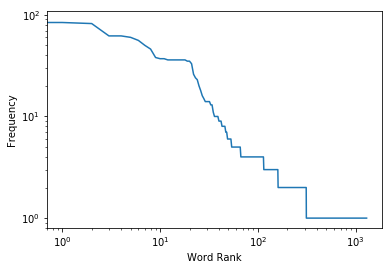

In [100]:
plt.loglog(word_counts)
plt.ylabel('Frequency')
plt.xlabel('Word Rank')

In [101]:
# Remarks: the x-axis value corresponds to the index of the tuple while y-axis corresponds to the frequency of
# the word in the tuple (the number of times a word appeared)
# Although labels for each word are not provided, x-axis values have been sorted so that the relationship between
# word frequencies is more apparent.

# Generating histograms of words, screen names and hashtags

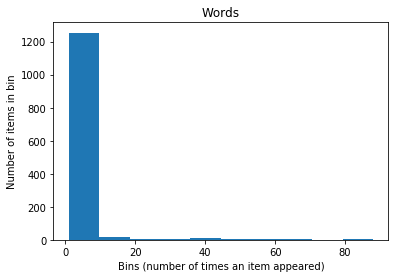

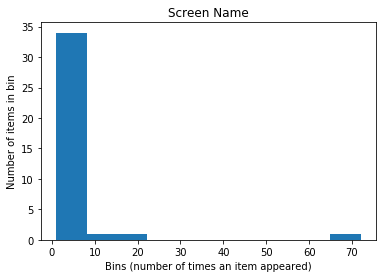

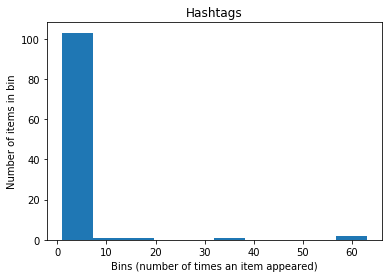

In [102]:
for label, data in (('Words', words),
                   ('Screen Name', screen_names), 
                   ('Hashtags', hashtags)):
    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(c.values())
    
    # Add a title and label
    plt.title(label)
    plt.ylabel('Number of items in bin')
    plt.xlabel('Bins (number of times an item appeared)')
    
    # display histogram
    plt.figure()

# Generating a histogram of retweet counts

In [103]:
# Using underscore while unpacking values in a tuple is idiomatic
# for discarding them
counts = [count for count, _, _ in retweets]

Text(0,0.5,'Number of tweets in bin')

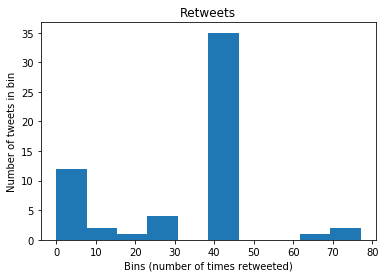

In [105]:
plt.hist(counts)
plt.title('Retweets')
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')